## Clouds - cl

Low Cloud Fraction (LCF) - maximum cloud fraction from 1000-600 hpa <br>
High Cloud Fraction (HCF) - maximum cloud fraction from 250-100 hpa <br>
<br>

In [26]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

from plotFuncs_metric import *

In [27]:
files = [
    'clouds_tMean',
    'clouds_sMean'
    ]

variables = [
    'cloud_low_tMean',
    'cloud_high_tMean',
    'cloud_low_sMean',
    'cloud_high_sMean'
]

model = 'GFDL-CM3'
cloud_low_snapshot = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_historical.nc')['cloud_low_snapshot']/100
cloud_high_snapshot = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_historical.nc')['cloud_high_snapshot']/100
cloud_low_tMean = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_' + files[0] + '_historical.nc')[variables[0]]/100
cloud_high_tMean = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_' + files[0] + '_historical.nc')[variables[1]]/100
cloud_low_sMean = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_' + files[1] + '_historical.nc')[variables[2]]/100
cloud_high_sMean = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_' + files[1] + '_historical.nc')[variables[3]]/100
aWeights = np.cos(np.deg2rad(cloud_low_tMean.lat))

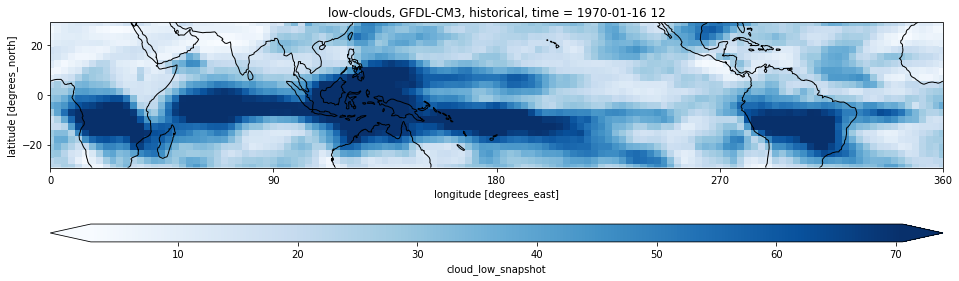

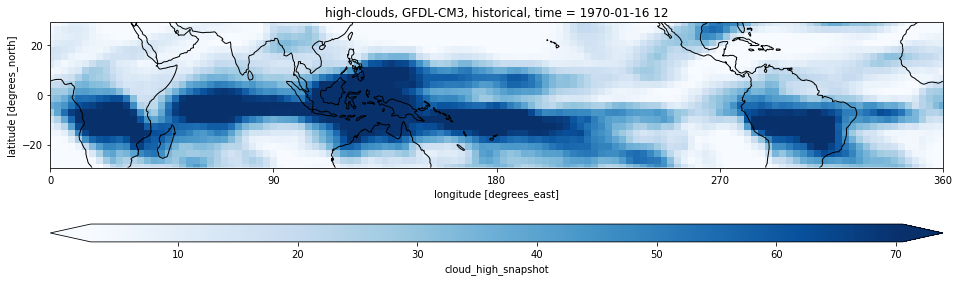

In [28]:
scene1 = cloud_low_snapshot 
scene2 = cloud_high_snapshot 
cmap="Blues"

ds = [scene1, scene2]
vmin, vmax = [], []
for dataset in ds:
    vmin = np.append(vmin, dataset.quantile(0.10,dim=('lat','lon')))
    vmax = np.append(vmax, dataset.quantile(0.90,dim=('lat','lon')))
vmin = np.min(vmin)
vmax = np.max(vmax)

title = 'low-clouds, ' + model + ', historical, ' + 'time = ' + str(scene1.coords['time'].values)[:13] 
plot_scene(scene1, cmap, title, vmin, vmax)

title = 'high-clouds, ' + model + ', historical, ' + 'time = ' + str(scene2.coords['time'].values)[:13] 
plot_scene(scene2, cmap, title, vmin, vmax)

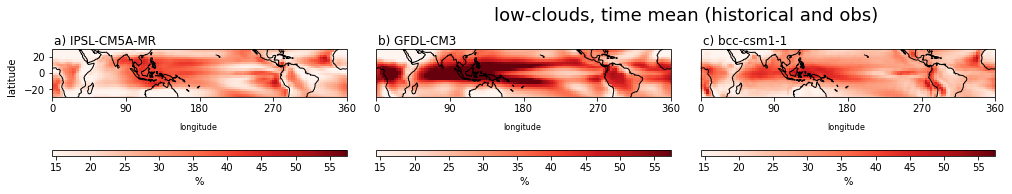

In [36]:
scene_types = [
    'experiment',
    # 'diff'
]
scene_type = scene_types[0]


models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]

ds = xr.Dataset()
for model in models:
    if scene_type == 'experiment':
        cmap="Blues"
        plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_' + experiment + '.nc')[variables[0]]/100
        plot_var.attrs['units']= '%'

    if scene_type == 'diff':
        cmap = "RdBu_r"
        historical = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_historical.nc')[variables[0]]
        rcp =  xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_rcp85.nc')[variables[0]]
        plot_var = xr.DataArray(
            data  = (rcp.data-historical.data),
            dims=['lat', 'lon'],
            coords={'lat': historical.lat.data, 'lon': historical.lon.data},
            attrs = {'units': '\u00B0C'})
        
    ds[model] = plot_var

for obs in observations:
    if scene_type == 'experiment':
        plot_var = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_'+ files[0] +'_.nc')[variables[0]]/100
        ds[obs] = plot_var


vmin, vmax = [], []
for dataset in list(ds.data_vars.keys()):
    vmin = np.append(vmin, ds[dataset].quantile(0.10,dim=('lat','lon')))
    vmax = np.append(vmax, ds[dataset].quantile(0.90,dim=('lat','lon')))
vmin = np.min(vmin)
vmax = np.max(vmax)


title = 'low-clouds, time mean (' + experiment + ' and obs)'
plot_scenes(ds, cmap, title, vmin=vmin, vmax=vmax)


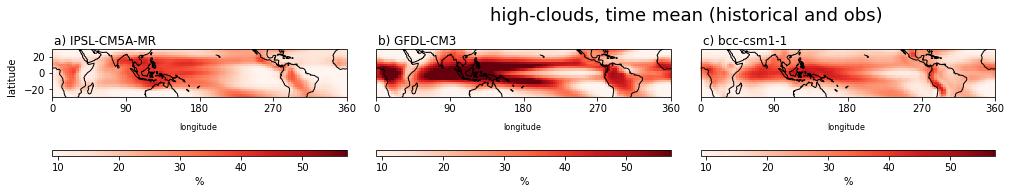

In [35]:
scene_types = [
    'experiment',
    # 'diff'
]
scene_type = scene_types[0]


models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]

ds = xr.Dataset()
for model in models:
    if scene_type == 'experiment':
        cmap="Blues"
        plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_' + experiment + '.nc')[variables[1]]/100
        plot_var.attrs['units']= '%'

    if scene_type == 'diff':
        cmap = "RdBu_r"
        historical = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_historical.nc')[variables[1]]
        rcp =  xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[0] +'_rcp85.nc')[variables[1]]
        plot_var = xr.DataArray(
            data  = (rcp.data-historical.data),
            dims=['lat', 'lon'],
            coords={'lat': historical.lat.data, 'lon': historical.lon.data},
            attrs = {'units': '\u00B0C'})
        
    ds[model] = plot_var

for obs in observations:
    if scene_type == 'experiment':
        plot_var = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_'+ files[0] +'_.nc')[variables[1]]/100
        ds[obs] = plot_var


vmin, vmax = [], []
for dataset in list(ds.data_vars.keys()):
    vmin = np.append(vmin, ds[dataset].quantile(0.10,dim=('lat','lon')))
    vmax = np.append(vmax, ds[dataset].quantile(0.90,dim=('lat','lon')))
vmin = np.min(vmin)
vmax = np.max(vmax)


title = 'high-clouds, time mean (' + experiment + ' and obs)'
plot_scenes(ds, cmap, title, vmin=vmin, vmax=vmax)


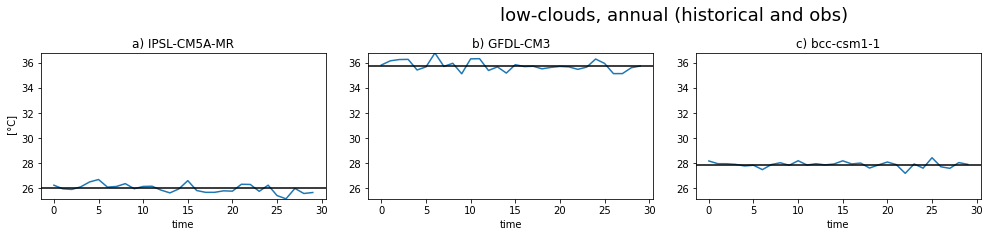

In [31]:
timeMean_options = [
    'annual',
    # 'season',
    # 'season_mean',
    # 'month',
    # 'month_mean',
    # 'day',
    ]
timeMean_option = timeMean_options[0]


models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]
    
ds = xr.Dataset()
for model in models:
    plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_' + experiment + '.nc')[variables[2]]/100
    plot_var = resample(plot_var, timeMean_option)
    plot_var.attrs['units']= '\u00B0C'
    ds[model] = plot_var

for obs in observations:
    plot_var = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_'+ files[1] +'_.nc')[variables[2]]/100
    plot_var = resample(plot_var, timeMean_option)
    ds[obs] = plot_var


ymin, ymax = [], []
for dataset in list(ds.data_vars.keys()):
    ymin = np.append(ymin, ds[dataset].min())
    ymax = np.append(ymax, ds[dataset].max())
ymin = np.min(ymin)
ymax = np.max(ymax)


title = 'low-clouds, ' + timeMean_option + ' (' + experiment + ' and obs)'
ylabel=''
plot_timeseries_multiple(ds, timeMean_option, title, ylabel, ymin, ymax)

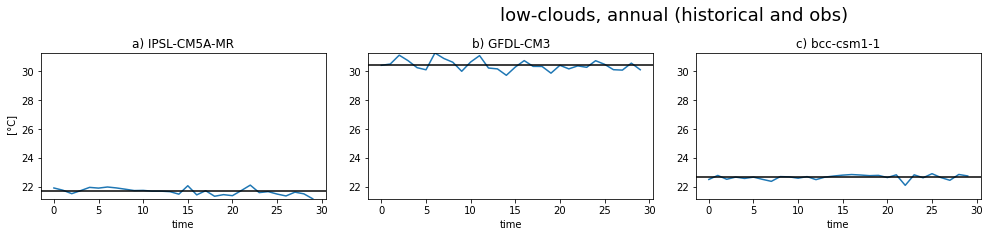

In [30]:
timeMean_options = [
    'annual',
    # 'season',
    # 'season_mean',
    # 'month',
    # 'month_mean',
    # 'day',
    ]
timeMean_option = timeMean_options[0]


models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]
    
ds = xr.Dataset()
for model in models:
    plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_' + experiment + '.nc')[variables[3]]/100
    plot_var = resample(plot_var, timeMean_option)
    plot_var.attrs['units']= '\u00B0C'
    ds[model] = plot_var

for obs in observations:
    plot_var = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_'+ files[1] +'_.nc')[variables[3]]/100
    plot_var = resample(plot_var, timeMean_option)
    ds[obs] = plot_var


ymin, ymax = [], []
for dataset in list(ds.data_vars.keys()):
    ymin = np.append(ymin, ds[dataset].min())
    ymax = np.append(ymax, ds[dataset].max())
ymin = np.min(ymin)
ymax = np.max(ymax)


title = 'low-clouds, ' + timeMean_option + ' (' + experiment + ' and obs)'
ylabel=''
plot_timeseries_multiple(ds, timeMean_option, title, ylabel, ymin, ymax)

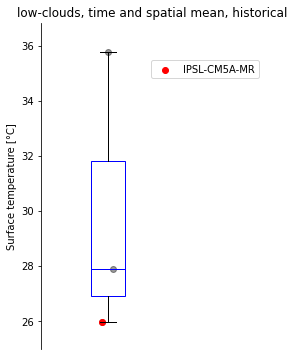

In [ ]:
scene_types = [
    'experiment',
    # 'diff'
]
scene_type = scene_types[0]

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]

ds = xr.Dataset()
ds.attrs['units']= '\u00B0C'
for model in models:
    if scene_type == 'experiment':
        cmap = "Reds"
        plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_' + experiment + '.nc')[variables[2]].mean(dim='time')/100

    if scene_type == 'diff':
        cmap = "RdBu_r"
        historical = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_historical.nc')[variables[2]]/100
        rcp =  xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_rcp85.nc')[variables[2]]/100
        plot_var = (rcp.data-historical.data)

    ds[model] = plot_var
        

ymin, ymax = [], []
for dataset in list(ds.data_vars.keys()):
    ymin = np.append(ymin, ds[dataset].min())
    ymax = np.append(ymax, ds[dataset].max())
ymin = np.min(ymin) - 0.10*(np.max(ymax) - np.min(ymin))
ymax = np.max(ymax) + 0.10*(np.max(ymax) - np.min(ymin))


labels =[
    'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    #,'darkred',
    # 'b', 
    # 'g'
    ]

title = 'low-clouds, time and spatial mean, ' + experiment
ylabel='Surface temperature'

boxplotColor(ds, labels, colors, title, ylabel, ymin, ymax)

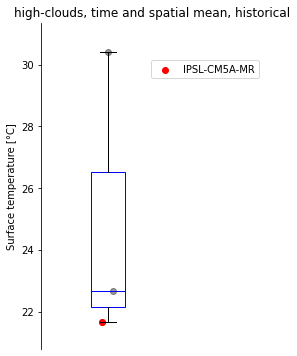

In [37]:
scene_types = [
    'experiment',
    # 'diff'
]
scene_type = scene_types[0]

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    # ''
]

ds = xr.Dataset()
ds.attrs['units']= '\u00B0C'
for model in models:
    if scene_type == 'experiment':
        cmap = "Reds"
        plot_var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_' + experiment + '.nc')[variables[3]].mean(dim='time')/100

    if scene_type == 'diff':
        cmap = "RdBu_r"
        historical = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_historical.nc')[variables[3]]/100
        rcp =  xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ files[1] +'_rcp85.nc')[variables[3]]/100
        plot_var = (rcp.data-historical.data)

    ds[model] = plot_var
        

ymin, ymax = [], []
for dataset in list(ds.data_vars.keys()):
    ymin = np.append(ymin, ds[dataset].min())
    ymax = np.append(ymax, ds[dataset].max())
ymin = np.min(ymin) - 0.10*(np.max(ymax) - np.min(ymin))
ymax = np.max(ymax) + 0.10*(np.max(ymax) - np.min(ymin))


labels =[
    'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    #,'darkred',
    # 'b', 
    # 'g'
    ]

title = 'high-clouds, time and spatial mean, ' + experiment
ylabel='Surface temperature'

boxplotColor(ds, labels, colors, title, ylabel, ymin, ymax)